In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
##import datasets:

#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')


In [3]:
# First five rows of meta, five columns, # start date 2012
print(meta.iloc[0:5, 0:10])
meta.shape

         DATE WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
0  01/01/2012               NaN          1          0           1   
1  01/02/2012               NaN          2          1           1   
2  01/03/2012               NaN          3          2           1   
3  01/04/2012               NaN          4          3           1   
4  01/05/2012               NaN          5          4           1   

   MONTHOFYEAR  YEAR          SEASON  HOLIDAYPX  HOLIDAYM  
0            1  2012  CHRISTMAS PEAK          0         5  
1            1  2012       CHRISTMAS          2         5  
2            1  2012       CHRISTMAS          3         0  
3            1  2012       CHRISTMAS          4         0  
4            1  2012       CHRISTMAS          5         0  


(2674, 190)

In [4]:
# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[splash.SPOSTMIN > 0]
pirates.head()
seven_dwarfs.head()

,date,datetime,SPOSTMIN,SACTMIN
0,06/04/2013,2013-06-04 09:00:00,30.0,NaN
1,06/04/2013,2013-06-04 09:30:00,30.0,NaN
2,06/04/2013,2013-06-04 10:00:00,60.0,NaN
3,06/04/2013,2013-06-04 10:30:00,60.0,NaN
4,06/04/2013,2013-06-04 11:00:00,60.0,NaN


In [5]:
#Merging each ride with meta_data, using date as key
meta_pirates = pd.merge(pirates, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [6]:
#Deleting irrelevant columns
filter_col = [col for col in meta_pirates if col.startswith('AK') | col.startswith('HS') | col.startswith('EP')]
len(filter_col)
meta_pirates = meta_pirates.drop(filter_col,axis=1)
meta_pirates.head(10)

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN
0,01/01/2012,2012-01-01 10:14:00,5.0,NaN,NaN,1,0,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
1,01/01/2012,2012-01-01 12:13:00,5.0,NaN,NaN,1,0,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
2,01/01/2012,2012-01-01 13:50:00,10.0,NaN,NaN,1,0,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
3,01/01/2012,2012-01-01 14:42:00,10.0,NaN,NaN,1,0,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
4,01/01/2012,2012-01-01 20:40:00,5.0,NaN,NaN,1,0,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
5,01/01/2012,2012-01-01 21:40:00,5.0,NaN,NaN,1,0,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
6,01/01/2012,2012-01-02 01:52:00,5.0,NaN,NaN,1,0,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
7,01/01/2012,2012-01-02 02:06:00,5.0,NaN,NaN,1,0,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
8,01/02/2012,2012-01-02 09:58:00,5.0,NaN,NaN,2,1,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
9,01/02/2012,2012-01-02 11:20:00,20.0,NaN,NaN,2,1,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular


In [7]:
meta_pirates.shape

(266897, 100)

In [8]:
#PIRATES
#change NAs to 0 values
meta_pirates = meta_pirates.fillna(0)
meta_pirates['date'] = pd.to_datetime(meta_pirates['date'])
meta_pirates.head()


,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN
0,2012-01-01,2012-01-01 10:14:00,5.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
1,2012-01-01,2012-01-01 12:13:00,5.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
2,2012-01-01,2012-01-01 13:50:00,10.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
3,2012-01-01,2012-01-01 14:42:00,10.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
4,2012-01-01,2012-01-01 20:40:00,5.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular


In [22]:
#weighted average on a day by hours in a day
wt = meta_pirates.groupby('date')['SPOSTMIN'].mean()
wt = wt.reset_index()
wt = pd.DataFrame(wt, columns = ['date','SPOSTMIN'])
wt.head

<bound method NDFrame.head of            date   SPOSTMIN
0    2012-01-01   6.250000
1    2012-01-02  21.923077
2    2012-01-03  22.500000
3    2012-01-04  17.692308
4    2012-01-05  19.722222
5    2012-01-06  16.250000
6    2012-01-07  15.769231
7    2012-01-08  11.052632
8    2012-01-09  18.750000
9    2012-01-10   8.888889
10   2012-01-11   7.500000
11   2012-01-12  20.000000
12   2012-01-13  14.090909
13   2012-01-14  15.666667
14   2012-01-15  14.500000
15   2012-01-16   8.000000
16   2012-01-17   9.166667
17   2012-01-18   5.833333
18   2012-01-19   5.000000
19   2012-01-20  17.500000
20   2012-01-21  25.769231
21   2012-01-22   7.500000
22   2012-01-23  15.000000
23   2012-01-24   6.904762
24   2012-01-25   7.000000
25   2012-01-27   7.857143
26   2012-01-28  14.687500
27   2012-01-29  10.909091
28   2012-01-30   7.500000
29   2012-01-31   7.272727
...         ...        ...
2495 2019-04-01  35.348837
2496 2019-04-02  33.677686
2497 2019-04-03  33.252033
2498 2019-04-04  27.94702

In [23]:
#Merging these wait times back into meta dataset

meta['DATE'] = pd.to_datetime(meta['DATE'])
meta_pirates1 = pd.merge(wt, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_pirates1.head(10)
print(meta_pirates1.shape)

(2525, 191)


In [9]:
#DWARFS
meta_dwarfs = pd.merge(seven_dwarfs, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [8]:
meta_dwarfs.shape


(226493, 193)

In [10]:
#Drop same irrelevant columns as with pirates data
meta_dwarfs = meta_dwarfs.drop(filter_col,axis=1)
meta_dwarfs.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN
0,06/04/2013,2013-06-04 09:00:00,30.0,NaN,NaN,3,154,22,6,2013,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular
1,06/04/2013,2013-06-04 09:30:00,30.0,NaN,NaN,3,154,22,6,2013,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular
2,06/04/2013,2013-06-04 10:00:00,60.0,NaN,NaN,3,154,22,6,2013,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular
3,06/04/2013,2013-06-04 10:30:00,60.0,NaN,NaN,3,154,22,6,2013,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular
4,06/04/2013,2013-06-04 11:00:00,60.0,NaN,NaN,3,154,22,6,2013,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular


In [11]:
#DWARFS
#change NAs to 0 values
meta_dwarfs = meta_dwarfs.fillna(0)
meta_dwarfs['date'] = pd.to_datetime(meta_dwarfs['date'])
meta_dwarfs.head()


In [12]:
meta_dwarfs.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN
0,2013-06-04,2013-06-04 09:00:00,30.0,0.0,0,3,154,22,6,2013,...,0,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,0,Wishes Nighttime Spectacular
1,2013-06-04,2013-06-04 09:30:00,30.0,0.0,0,3,154,22,6,2013,...,0,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,0,Wishes Nighttime Spectacular
2,2013-06-04,2013-06-04 10:00:00,60.0,0.0,0,3,154,22,6,2013,...,0,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,0,Wishes Nighttime Spectacular
3,2013-06-04,2013-06-04 10:30:00,60.0,0.0,0,3,154,22,6,2013,...,0,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,0,Wishes Nighttime Spectacular
4,2013-06-04,2013-06-04 11:00:00,60.0,0.0,0,3,154,22,6,2013,...,0,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,0,Wishes Nighttime Spectacular


In [31]:
#weighted average on a day by hours in a day
wt = meta_dwarfs.groupby('date')['SPOSTMIN'].mean()
wt = wt.reset_index()
wt = pd.DataFrame(wt, columns = ['date','SPOSTMIN'])
wt.head

<bound method NDFrame.head of            date    SPOSTMIN
0    2013-06-04   84.800000
1    2014-05-23   74.453125
2    2014-05-24   60.263158
3    2014-05-25   84.621212
4    2014-05-26   72.107843
5    2014-05-27   66.893204
6    2014-05-28   83.371212
7    2014-05-29   85.463918
8    2014-05-30   81.181818
9    2014-05-31  107.908163
10   2014-06-01   93.421053
11   2014-06-02   96.478261
12   2014-06-03   78.769841
13   2014-06-04   92.634409
14   2014-06-05   68.785714
15   2014-06-06   91.028037
16   2014-06-07   91.760000
17   2014-06-08   98.556701
18   2014-06-09   80.641026
19   2014-06-10   73.818182
20   2014-06-11   92.656250
21   2014-06-12   81.477273
22   2014-06-13   86.296296
23   2014-06-14   78.823529
24   2014-06-15  105.692308
25   2014-06-16   82.938931
26   2014-06-17   81.740741
27   2014-06-18   81.388889
28   2014-06-19   74.957265
29   2014-06-20   78.186275
...         ...         ...
1773 2019-04-01  107.773438
1774 2019-04-02  103.407407
1775 2019-04-03  1

In [32]:
#Merging these wait times back into meta dataset
meta['DATE'] = pd.to_datetime(meta['DATE'])
meta_dwarfs1 = pd.merge(wt, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_dwarfs1.head(10)
print(meta_dwarfs1.shape)

(1803, 191)


In [13]:
##Splash mountain
meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [11]:
meta_splash.shape

(247122, 193)

In [14]:
#Deleting irrelevant columns like with splash and pirates
meta_splash = meta_splash.drop(filter_col,axis=1)
meta_splash.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN
0,01/01/2012,2012-01-01 10:31:00,30.0,NaN,NaN,1,0,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
1,01/01/2012,2012-01-01 10:40:00,30.0,NaN,NaN,1,0,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
2,01/01/2012,2012-01-01 12:02:00,30.0,NaN,NaN,1,0,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
3,01/01/2012,2012-01-01 12:38:00,35.0,NaN,NaN,1,0,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
4,01/01/2012,2012-01-01 12:44:00,25.0,NaN,NaN,1,0,1,1,2012,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular


In [15]:
#SPLASH MOUNTAIN
#change NAs to 0 values
meta_splash = meta_splash.fillna(0)
meta_splash['date'] = pd.to_datetime(meta_splash['date'])
meta_splash.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
2,2012-01-01,2012-01-01 12:02:00,30.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
3,2012-01-01,2012-01-01 12:38:00,35.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
4,2012-01-01,2012-01-01 12:44:00,25.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular


In [108]:
#weighted average on a day by hours in a day
wtsplash = meta_splash.groupby('date')['SPOSTMIN'].mean()
wtsplash = wtsplash.reset_index()
wtsplash = pd.DataFrame(wtsplash, columns = ['date','SPOSTMIN'])
wtsplash.head

<bound method NDFrame.head of            date   SPOSTMIN
0    2012-01-01  37.727273
1    2012-01-02  43.750000
2    2012-01-03   5.000000
3    2012-01-04  17.142857
4    2012-01-05  41.153846
5    2012-01-06  37.666667
6    2012-01-07  25.625000
7    2012-01-08  18.043478
8    2012-01-09  53.500000
9    2012-01-10  32.307692
10   2012-01-11   7.857143
11   2012-01-12  56.818182
12   2012-01-13   5.000000
13   2012-01-14   8.000000
14   2012-01-15  14.444444
15   2012-01-16  33.000000
16   2012-01-17  51.250000
17   2012-01-18  10.000000
18   2012-01-19   6.250000
19   2012-01-20  36.250000
20   2012-01-21  28.333333
21   2012-01-22  20.000000
22   2012-01-23  38.750000
23   2012-01-24  42.500000
24   2012-01-25  10.000000
25   2012-01-26  36.875000
26   2012-01-27  12.500000
27   2012-01-28  30.000000
28   2012-01-29  19.600000
29   2012-01-30  22.500000
...         ...        ...
2351 2019-04-01  42.500000
2352 2019-04-02  52.833333
2353 2019-04-03  75.280000
2354 2019-04-04  54.79729

In [109]:
#Merging these wait times back into meta dataset
meta['DATE'] = pd.to_datetime(meta['DATE'])
meta_splash1 = pd.merge(wtsplash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_splash1.head(10)
print(meta_splash1.shape)

(2381, 191)


In [12]:
#deleting columns not related to Magic Kingdom:
meta_pirates1.head()
filter_col = [col for col in meta_pirates1 if col.startswith('AK') | col.startswith('HS') | col.startswith('EP')]
len(filter_col)
meta_pirates1 = meta_pirates1.drop(filter_col,axis=1)

meta_dwarfs = meta_dwarfs.drop(filter_col,axis=1)

NameError: name 'meta_dwarfs' is not defined

In [16]:
#Group by season
seasonal = meta_pirates1.groupby('SEASON')
christmas_pirates = seasonal.get_group('CHRISTMAS')
#print(christmas_pirates.head())
#Plot times for everyday wait time throughout the years 
#christmas_pirates.plot(x="date", y = "SPOSTMIN")
ax = sns.barplot(x = "date", y = "SPOSTMIN", data = christmas_pirates)
christmas_pirates.mean()

#Mean wait time for christmas season:
christmas_pirates.loc[:,"SPOSTMIN"].mean()

summer = seasonal.get_group('SUMMER BREAK') #271 rows
summer

christmas_pirates

NameError: name 'meta_pirates1' is not defined

In [84]:
#Group by season for pirates
#First getting number of counts of observations per season:
print(meta_pirates1.groupby('SEASON')['date'].count())
#in one year:
#2016 had the most observations: 364 days
season2016 = meta_pirates1[meta_pirates1.YEAR == 2016]
season2016.shape
seasonal = meta_pirates1.groupby('SEASON')['SPOSTMIN'].mean().reset_index()
print(seasonal)

SEASON
CHRISTMAS                        127
CHRISTMAS PEAK                    43
COLUMBUS DAY                      26
EASTER                           150
FALL                             297
HALLOWEEN                         36
JERSEY WEEK                       70
JULY 4TH                          30
MARDI GRAS                        23
MARTIN LUTHER KING JUNIOR DAY     72
MEMORIAL DAY                      28
PRESIDENTS WEEK                   88
SEPTEMBER LOW                    166
SPRING                           680
SUMMER BREAK                     271
THANKSGIVING                      84
WINTER                           334
Name: date, dtype: int64
                           SEASON   SPOSTMIN
0                       CHRISTMAS  26.019460
1                  CHRISTMAS PEAK  36.532442
2                    COLUMBUS DAY  26.435941
3                          EASTER  26.984632
4                            FALL  20.179290
5                       HALLOWEEN  16.990861
6                     JE

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text xticklabel objects>)

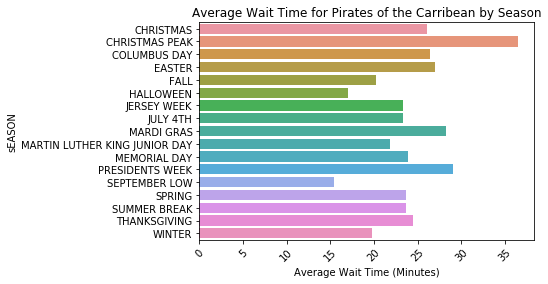

In [91]:
#Plot pirate wait times by season:
ax = sns.barplot(x="SPOSTMIN", y = "SEASON", data = seasonal)
ax.set(xlabel = 'Average Wait Time (Minutes)', ylabel = 'SEASON', title = 'Average Wait Time for Pirates of the Carribean by Season')
plt.xticks(rotation = 45)

In [93]:
#First getting number of counts of observations per season:
print(meta_dwarfs1.groupby('SEASON')['date'].count())
#in one year:
#2016 had the most observations: 364 days
#season2016 = meta_pirates1[meta_pirates1.YEAR == 2016]
#season2016.shape
seasonal_dwarfs = meta_dwarfs1.groupby('SEASON')['SPOSTMIN'].mean().reset_index()
seasonal_dwarfs

SEASON
CHRISTMAS                         85
CHRISTMAS PEAK                    30
COLUMBUS DAY                      20
EASTER                            95
FALL                             213
HALLOWEEN                         25
JERSEY WEEK                       50
JULY 4TH                          25
MARDI GRAS                        15
MARTIN LUTHER KING JUNIOR DAY     45
MEMORIAL DAY                      20
PRESIDENTS WEEK                   55
SEPTEMBER LOW                    138
SPRING                           469
SUMMER BREAK                     235
THANKSGIVING                      60
WINTER                           223
Name: date, dtype: int64


,SEASON,SPOSTMIN
0,CHRISTMAS,92.541658
1,CHRISTMAS PEAK,110.398173
2,COLUMBUS DAY,76.681646
3,EASTER,93.325360
4,FALL,64.802254
5,HALLOWEEN,61.215369
6,JERSEY WEEK,72.880124
7,JULY 4TH,82.678782
8,MARDI GRAS,91.011166
9,MARTIN LUTHER KING JUNIOR DAY,85.407415


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text xticklabel objects>)

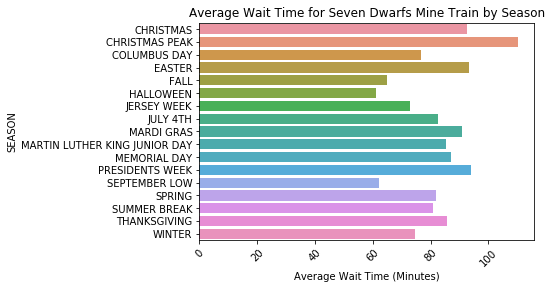

In [94]:
#Plot dwarfs wait times by season:
ax = sns.barplot(x="SPOSTMIN", y = "SEASON", data = seasonal_dwarfs)
ax.set(xlabel = 'Average Wait Time (Minutes)', ylabel = 'SEASON', title = 'Average Wait Time for Seven Dwarfs Mine Train by Season')
plt.xticks(rotation = 45)

In [110]:
#First getting number of counts of observations per season:
print(meta_splash1.groupby('SEASON')['date'].count())
#in one year:
#2016 had the most observations: 364 days
#season2016 = meta_pirates1[meta_pirates1.YEAR == 2016]
#season2016.shape
seasonal_splash = meta_splash1.groupby('SEASON')['SPOSTMIN'].mean().reset_index()
seasonal_splash

SEASON
CHRISTMAS                        108
CHRISTMAS PEAK                    43
COLUMBUS DAY                      24
EASTER                           152
FALL                             262
HALLOWEEN                         29
JERSEY WEEK                       60
JULY 4TH                          35
MARDI GRAS                        15
MARTIN LUTHER KING JUNIOR DAY     35
MEMORIAL DAY                      28
PRESIDENTS WEEK                   65
SEPTEMBER LOW                    174
SPRING                           688
SUMMER BREAK                     326
THANKSGIVING                      84
WINTER                           253
Name: date, dtype: int64


,SEASON,SPOSTMIN
0,CHRISTMAS,34.872556
1,CHRISTMAS PEAK,49.420553
2,COLUMBUS DAY,37.672452
3,EASTER,55.131450
4,FALL,25.488904
5,HALLOWEEN,23.272864
6,JERSEY WEEK,25.809633
7,JULY 4TH,53.198215
8,MARDI GRAS,44.983433
9,MARTIN LUTHER KING JUNIOR DAY,28.800624


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text xticklabel objects>)

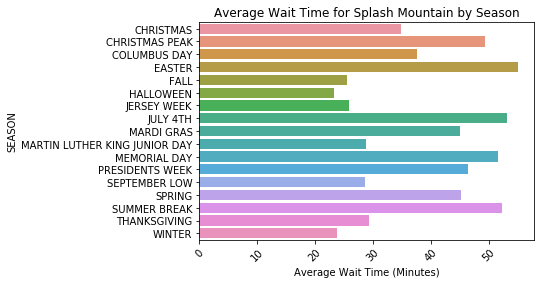

In [111]:
#Plot splash wait times by season:
ax = sns.barplot(x="SPOSTMIN", y = "SEASON", data = seasonal_splash)
ax.set(xlabel = 'Average Wait Time (Minutes)', ylabel = 'SEASON', title = 'Average Wait Time for Splash Mountain by Season')
plt.xticks(rotation = 45)

## Wait times in relation to other rides

In [ ]:
#Merging to create an overall dataset that has the estimated wait times for all three rides in one dataset
meta_total = pd.merge(pirates, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [31]:
pirateswait = meta_pirates[['date','datetime','SPOSTMIN','SACTMIN','SEASON','YEAR']]
pirateswait['Ride'] = 'Pirates'
print(pirateswait.head())
dwarfswait = meta_dwarfs[['date','datetime','SPOSTMIN','SACTMIN','SEASON','YEAR']]
dwarfswait['Ride'] = 'Seven Dwarfs'
print(dwarfswait.head())
splashwait = meta_splash[['date','datetime','SPOSTMIN','SACTMIN','SEASON','YEAR']]
splashwait['Ride'] = 'Splash Mountain'
splashwait.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


        date             datetime  SPOSTMIN  SACTMIN          SEASON  YEAR  \
0 2012-01-01  2012-01-01 10:14:00       5.0      0.0  CHRISTMAS PEAK  2012   
1 2012-01-01  2012-01-01 12:13:00       5.0      0.0  CHRISTMAS PEAK  2012   
2 2012-01-01  2012-01-01 13:50:00      10.0      0.0  CHRISTMAS PEAK  2012   
3 2012-01-01  2012-01-01 14:42:00      10.0      0.0  CHRISTMAS PEAK  2012   
4 2012-01-01  2012-01-01 20:40:00       5.0      0.0  CHRISTMAS PEAK  2012   

      Ride  
0  Pirates  
1  Pirates  
2  Pirates  
3  Pirates  
4  Pirates  


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


        date             datetime  SPOSTMIN  SACTMIN  SEASON  YEAR  \
0 2013-06-04  2013-06-04 09:00:00      30.0      0.0  SPRING  2013   
1 2013-06-04  2013-06-04 09:30:00      30.0      0.0  SPRING  2013   
2 2013-06-04  2013-06-04 10:00:00      60.0      0.0  SPRING  2013   
3 2013-06-04  2013-06-04 10:30:00      60.0      0.0  SPRING  2013   
4 2013-06-04  2013-06-04 11:00:00      60.0      0.0  SPRING  2013   

           Ride  
0  Seven Dwarfs  
1  Seven Dwarfs  
2  Seven Dwarfs  
3  Seven Dwarfs  
4  Seven Dwarfs  


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,datetime,SPOSTMIN,SACTMIN,SEASON,YEAR,Ride
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,CHRISTMAS PEAK,2012,Splash Mountain
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,CHRISTMAS PEAK,2012,Splash Mountain
2,2012-01-01,2012-01-01 12:02:00,30.0,0.0,CHRISTMAS PEAK,2012,Splash Mountain
3,2012-01-01,2012-01-01 12:38:00,35.0,0.0,CHRISTMAS PEAK,2012,Splash Mountain
4,2012-01-01,2012-01-01 12:44:00,25.0,0.0,CHRISTMAS PEAK,2012,Splash Mountain


In [34]:
#Combine all three rides into one dataset to plot their wait times against each other
allrides = pd.concat([pirateswait, dwarfswait, splashwait])
allrides.shape

,date,datetime,SPOSTMIN,SACTMIN,SEASON,YEAR,Ride
0,2012-01-01,2012-01-01 10:14:00,5.0,0.0,CHRISTMAS PEAK,2012,Pirates
1,2012-01-01,2012-01-01 12:13:00,5.0,0.0,CHRISTMAS PEAK,2012,Pirates
2,2012-01-01,2012-01-01 13:50:00,10.0,0.0,CHRISTMAS PEAK,2012,Pirates
3,2012-01-01,2012-01-01 14:42:00,10.0,0.0,CHRISTMAS PEAK,2012,Pirates
4,2012-01-01,2012-01-01 20:40:00,5.0,0.0,CHRISTMAS PEAK,2012,Pirates


In [30]:
pirateschristmas = pirateswait.groupby('SEASON').get_group('CHRISTMAS PEAK')
pirateschristmas.loc[pirateschristmas['SPOSTMIN'].idxmax()]

#From this, the longest wait time recorded was 125 minutes on December 30th 2013

date        2013-12-30 00:00:00
datetime    2013-12-30 16:42:00
SPOSTMIN                    125
SACTMIN                       0
SEASON           CHRISTMAS PEAK
YEAR                       2013
Name: 50290, dtype: object

In [80]:
allridesmax = allrides.loc[allrides.date == "2015-12-30"]
allridesmax.shape
allridesmax.isnull().sum(axis = 0)
#allridesmax = allridesmax.dropna()
#allridesmax = allridesmax.dropna(axis=0, subset=['SPOSTMIN'])
allridesmax.head()

,date,datetime,SPOSTMIN,SACTMIN,SEASON,YEAR,Ride
125715,2015-12-30,2015-12-30 10:21:00,50.0,0.0,CHRISTMAS PEAK,2015,Pirates
125716,2015-12-30,2015-12-30 10:27:00,50.0,0.0,CHRISTMAS PEAK,2015,Pirates
125717,2015-12-30,2015-12-30 10:35:00,60.0,0.0,CHRISTMAS PEAK,2015,Pirates
125718,2015-12-30,2015-12-30 10:38:00,65.0,0.0,CHRISTMAS PEAK,2015,Pirates
125719,2015-12-30,2015-12-30 10:42:00,60.0,0.0,CHRISTMAS PEAK,2015,Pirates


In [84]:
allrides2 = allridesmax.pivot_table('SPOSTMIN', 'datetime', 'Ride')
#allrides2 = allrides2.fillna(0)
#allrides2.dropna()
allrides2

allrides2.columns = allrides2.columns.droplevel(0)
#allrides2 = allrides2.reset_index().rename_axis(None, axis=1)
#ax = sns.lineplot(x="datetime", y="Pirates", data=allrides2)

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

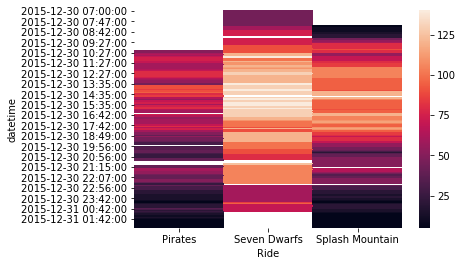

In [79]:
ax = sns.heatmap(allridesmax.pivot_table('SPOSTMIN', 'datetime', 'Ride'))

ValueError: x and y must have same first dimension, but have shapes (1,) and (188,)

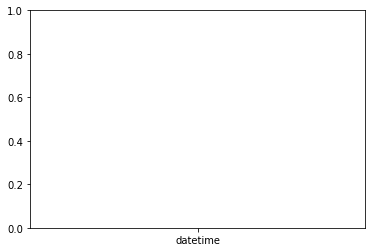

In [74]:
plt.plot('datetime', 'Pirates', data=allrides2, color='skyblue')
plt.plot('datetime', 'Seven Dwarfs', data=allrides2, color='olive')
plt.plot('datetime', 'Splash Mountain', data=allrides2, color='red')
plt.legend()


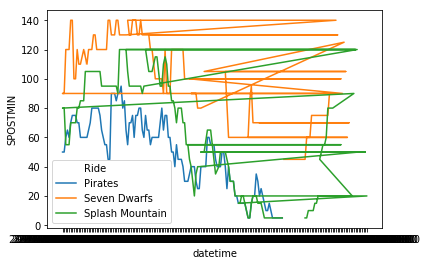

In [58]:
#Plotting the hourly wait times for all rides on december 30th, 2013
ax = sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", data=allridesmax)

In [124]:
maxpirates_christmas['datetime'] = pd.to_datetime(maxpirates_christmas['datetime'], infer_datetime_format=True)
#maxpirates_christmas.dtypes
#maxpirates_christmas.groupby(maxpirates_christmas.datetime.hour).mean()
print(maxpirates_christmas)

byhour = maxpirates_christmas.groupby(maxpirates_christmas.datetime.dt.hour).mean().reset_index()

             date            datetime  SPOSTMIN  SACTMIN          SEASON  \
125715 2015-12-30 2015-12-30 10:21:00      50.0      0.0  CHRISTMAS PEAK   
125716 2015-12-30 2015-12-30 10:27:00      50.0      0.0  CHRISTMAS PEAK   
125717 2015-12-30 2015-12-30 10:35:00      60.0      0.0  CHRISTMAS PEAK   
125718 2015-12-30 2015-12-30 10:38:00      65.0      0.0  CHRISTMAS PEAK   
125719 2015-12-30 2015-12-30 10:42:00      60.0      0.0  CHRISTMAS PEAK   
125720 2015-12-30 2015-12-30 10:49:00      70.0      0.0  CHRISTMAS PEAK   
125721 2015-12-30 2015-12-30 11:00:00      75.0      0.0  CHRISTMAS PEAK   
125722 2015-12-30 2015-12-30 11:07:00      75.0      0.0  CHRISTMAS PEAK   
125723 2015-12-30 2015-12-30 11:14:00      75.0      0.0  CHRISTMAS PEAK   
125724 2015-12-30 2015-12-30 11:21:00      70.0      0.0  CHRISTMAS PEAK   
125725 2015-12-30 2015-12-30 11:27:00      70.0      0.0  CHRISTMAS PEAK   
125726 2015-12-30 2015-12-30 11:35:00      60.0      0.0  CHRISTMAS PEAK   
125727 2015-

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


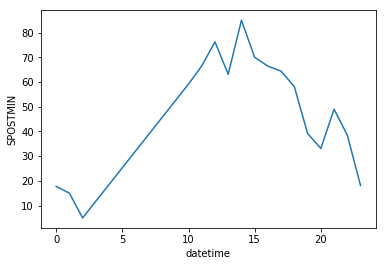

In [125]:
ax = sns.lineplot(x="datetime", y="SPOSTMIN", data=byhour)

In [131]:
maxdwarfs_christmas['datetime'] = pd.to_datetime(maxdwarfs_christmas['datetime'], infer_datetime_format=True)


byhourdwarfs = maxdwarfs_christmas.groupby(maxdwarfs_christmas.datetime.dt.hour).mean().reset_index()
byhourdwarfs

#Need to move the first row to the end, since it is actually the next day


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,datetime,SPOSTMIN,SACTMIN,YEAR
0,0,72.000000,0.0,2015
1,7,45.000000,0.0,2015
2,8,63.333333,0.0,2015
3,9,78.333333,0.0,2015
4,10,105.714286,0.0,2015
5,11,114.000000,0.0,2015
6,12,122.500000,0.0,2015
7,13,127.500000,0.0,2015
8,14,132.857143,0.0,2015
9,15,135.555556,0.0,2015


In [136]:

target_row = byhourdwarfs.ix[[0],:]
target_row
byhourdwarfs = byhourdwarfs.shift(-1)
byhourdwarfs.iloc[-1] = target_row.squeeze()
byhourdwarfs

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,datetime,SPOSTMIN,SACTMIN,YEAR
0,7.0,45.000000,0.0,2015.0
1,8.0,63.333333,0.0,2015.0
2,9.0,78.333333,0.0,2015.0
3,10.0,105.714286,0.0,2015.0
4,11.0,114.000000,0.0,2015.0
5,12.0,122.500000,0.0,2015.0
6,13.0,127.500000,0.0,2015.0
7,14.0,132.857143,0.0,2015.0
8,15.0,135.555556,0.0,2015.0
9,16.0,130.000000,0.0,2015.0


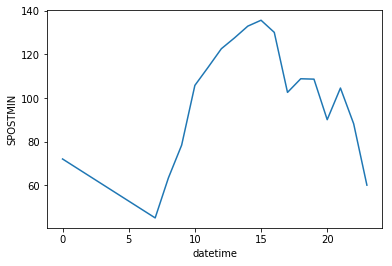

In [137]:
ax = sns.lineplot(x="datetime", y="SPOSTMIN", data=byhourdwarfs)

In [126]:
maxpirates_christmas = pirateswait.loc[pirateswait.date == "2015-12-30"]
#maxpirates_christmas = pirateswait.loc[pirateswait.YEAR == 2013] takes too long, probably can only plot a day at a time
print(maxpirates_christmas.head())


maxdwarfs_christmas = dwarfswait.loc[dwarfswait.date == "2015-12-30"]
maxdwarfs_christmas

             date             datetime  SPOSTMIN  SACTMIN          SEASON  \
125715 2015-12-30  2015-12-30 10:21:00      50.0      0.0  CHRISTMAS PEAK   
125716 2015-12-30  2015-12-30 10:27:00      50.0      0.0  CHRISTMAS PEAK   
125717 2015-12-30  2015-12-30 10:35:00      60.0      0.0  CHRISTMAS PEAK   
125718 2015-12-30  2015-12-30 10:38:00      65.0      0.0  CHRISTMAS PEAK   
125719 2015-12-30  2015-12-30 10:42:00      60.0      0.0  CHRISTMAS PEAK   

        YEAR     Ride  
125715  2015  Pirates  
125716  2015  Pirates  
125717  2015  Pirates  
125718  2015  Pirates  
125719  2015  Pirates  


,date,datetime,SPOSTMIN,SACTMIN,SEASON,YEAR,Ride
80120,2015-12-30,2015-12-30 07:00:00,45.0,0.0,CHRISTMAS PEAK,2015,Seven Dwarfs
80121,2015-12-30,2015-12-30 07:07:00,45.0,0.0,CHRISTMAS PEAK,2015,Seven Dwarfs
80122,2015-12-30,2015-12-30 07:14:00,45.0,0.0,CHRISTMAS PEAK,2015,Seven Dwarfs
80123,2015-12-30,2015-12-30 07:20:00,45.0,0.0,CHRISTMAS PEAK,2015,Seven Dwarfs
80124,2015-12-30,2015-12-30 07:21:00,45.0,0.0,CHRISTMAS PEAK,2015,Seven Dwarfs
80125,2015-12-30,2015-12-30 07:27:00,45.0,0.0,CHRISTMAS PEAK,2015,Seven Dwarfs
80126,2015-12-30,2015-12-30 07:33:00,45.0,0.0,CHRISTMAS PEAK,2015,Seven Dwarfs
80127,2015-12-30,2015-12-30 07:35:00,45.0,0.0,CHRISTMAS PEAK,2015,Seven Dwarfs
80128,2015-12-30,2015-12-30 07:42:00,45.0,0.0,CHRISTMAS PEAK,2015,Seven Dwarfs
80129,2015-12-30,2015-12-30 07:47:00,45.0,0.0,CHRISTMAS PEAK,2015,Seven Dwarfs


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135],
 <a list of 136 Text xticklabel objects>)

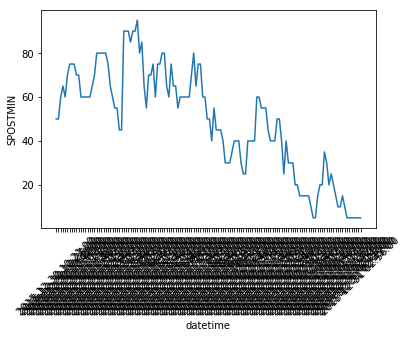

In [102]:
ax = sns.lineplot(x="datetime", y="SPOSTMIN", data=maxpirates_christmas)
plt.xticks(rotation = 45)
#ax = sns.lineplot(x="datetime", y="SPOSTMIN", data=maxdwarfs_christmas)

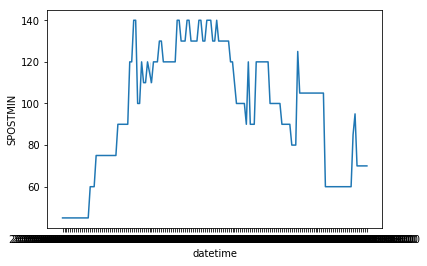

In [100]:
ax = sns.lineplot(x="datetime", y="SPOSTMIN", data=maxdwarfs_christmas)

In [42]:
meta_pirates1.groupby('SEASON').count()

#Only getting yearly data:
pirates2012 = meta_pirates1.loc[meta_pirates1.YEAR == 2012]
pirates2012.groupby('SEASON').count().sum()
pirates2012.groupby('SEASON').count()

piratessummer = meta_pirates1.loc[meta_pirates1.SEASON == "SUMMER BREAK"]
piratessummer

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
178,2012-07-01,9.000000,NaN,1,182,27,7,2012,SUMMER BREAK,4,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
184,2012-07-07,5.000000,NaN,7,188,27,7,2012,SUMMER BREAK,4,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
185,2012-07-08,8.571429,NaN,1,189,28,7,2012,SUMMER BREAK,5,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
186,2012-07-09,21.000000,NaN,2,190,28,7,2012,SUMMER BREAK,6,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
187,2012-07-10,16.875000,NaN,3,191,28,7,2012,SUMMER BREAK,7,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
188,2012-07-11,17.500000,NaN,4,192,28,7,2012,SUMMER BREAK,8,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
189,2012-07-12,14.642857,NaN,5,193,28,7,2012,SUMMER BREAK,9,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
190,2012-07-13,18.750000,NaN,6,194,28,7,2012,SUMMER BREAK,10,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
191,2012-07-14,10.000000,NaN,7,195,28,7,2012,SUMMER BREAK,11,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
192,2012-07-15,11.666667,NaN,1,196,29,7,2012,SUMMER BREAK,12,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
